<h1> Informe de laboratorio 4 </h1>
<h2> Análisis de series de tiempo </h2>
1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.wavfile import read
data = np.loadtxt('data_precipitacion.txt', delimiter = ",")

<b> 2) </b> El período de muestreo es 1 día

In [3]:
np.shape(data)

(12410, 3)

In [40]:
day = data[:, 0]
year = data[:, 1]
value = data[:, 2]

In [41]:
np.shape(day)

(12410,)

<function matplotlib.pyplot.show(*args, **kw)>

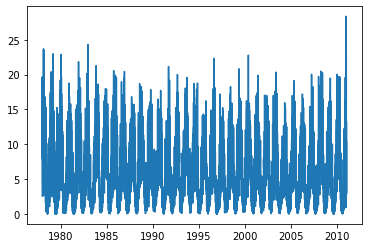

In [46]:
t = np.linspace(1978, 2011, len(value))
plt.plot(t, value)
plt.show

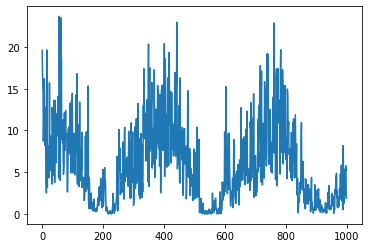

In [12]:
plt.plot(value[0:1000])

Se puede observar que la señal de precipitación tiene un comportamiento semiperiódico o muy parecido a una señal periodica, con un pico cada 200 días aproximadamente como se puede ver en la ventana, del zoom. 
Solo hubo una discrepancia alta en el último pico del 2011 con respecto a los demás picos.

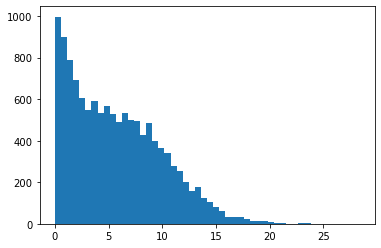

In [36]:
n, bins, patches = plt.hist(x = value, bins=50)

Se puede observar que graficando 50 muestras de tiempo, es decir agrupando los datos en grupos de 248 muestras se puede observar que la precipitación definitivamnte va en disminución, siendo esta disminución mucho más notoria desde el bin 10 hast el último.

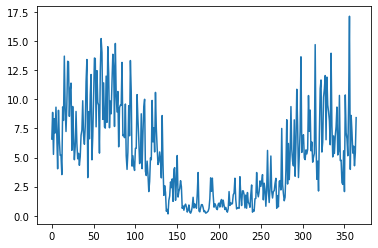

In [39]:
inicio_1998 = 365*20
birth_year = value[inicio_1998:inicio_1998+365]
plt.plot(birth_year)

Se puede observar que al rededor de los días 270 y 350 hay valores altos de precipitación, esto corresponderían a los meses de septiembre a noviembre pa luego volver a bajar. Siendo los días de menor precipatación los que corresponden al periodo de tiempo entre 140 y 250 días aproximadamente, estos días corresponden a los meses de mayo a agosto. Curiosamente corresponden también con los meses de verano del hemisferio norte, diciendónos que tiene una gran relación con las estaiones del norte, y no tanto con las estaciones del cono sur, ya que en los meses de verano del cono sur su precipitación no es tan baja como en los meses citados anteriormente, pero tampoco son los meses con mayor precipitación, por lo que tampoco se puede ver una correlación inversa entre estos factores

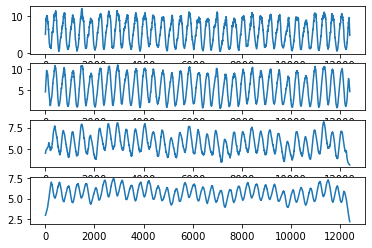

In [51]:
fig, axs = plt.subplots(4)
count = 0
for i in [50, 100, 274, 486]:
    coefs = np.ones(i)/float(i)
    senal_smooth = np.convolve(value, coefs, mode = 'same')
    axs[count].plot(senal_smooth)
    count += 1

Al hacer la convolución con este filtro y usar más valores se va obteniendo lo que se espera, al aumentar el número de muestras se vuelve más suave y más general dicha señal, se nota con menos picos y menos ruido, mientras que en los valores más pequeños de L se notan más picos y más "ruido".
Se utiliza el modo same porque sólo necesitamos ver la respuesta en este caso en el número de muestras de la señal, con este modo nos permite hacer eso, con el full el eje de las muestras se ve perturbado por el número de muestras en el filtro, aquí no.

In [52]:
from ztrans import *

C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


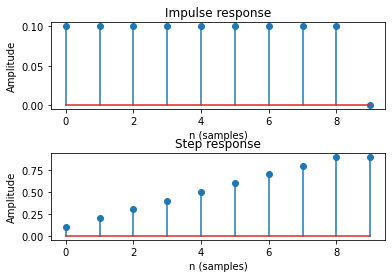

In [53]:
L = 10
num = np.zeros(L)
num[0]= 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1
impz(num, den)

C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


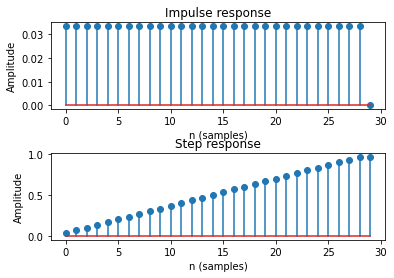

In [60]:
L = 30
num = np.zeros(L)
num[0]= 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1
impz(num, den)

Se puede ver que al aumentar el orden del filtro en la respuesta al impulso hay una mayor duración y una mayor amplitud de la señal cuadrada.
Mientras que en la respuesta al escalón hay también una mayor amplitud pero un mayor número de muestras también. Al hacer el cálculo se puede observar que tiene una mayor pendiente la respuesta de menor orden que la de mayor orden. Tiene sentido al tener que esperar por menos muestras da una respuesta más rápida, tiene mayor frecuencia

C:\Users\josed\anaconda3\lib\site-packages\scipy\signal\filter_design.py:473: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


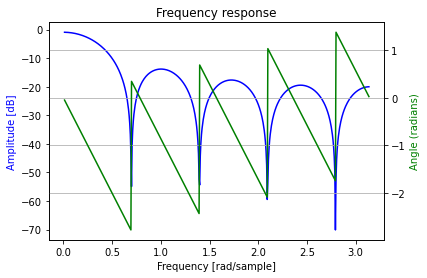

In [64]:
L = 10
num = np.zeros(L)
num[0]= 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1
mfreqz(num, den)

C:\Users\josed\anaconda3\lib\site-packages\scipy\signal\filter_design.py:473: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


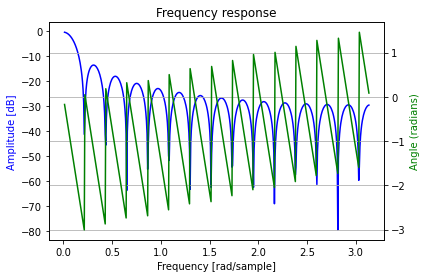

In [65]:
L = 30
num = np.zeros(L)
num[0]= 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1
mfreqz(num, den)

Es un filtro que deja pasar frecuencias en rangos periódicos, a mayor orden más periodos o más frecuencias dejará pasar, pero con una atenuación mayor al llegar a la frecuencia que se está haciendo el promedio. En la ventana de un promedio es un filtro pasabandas. Su respuesta en la fase es periódica también debido a la naturaleza del filtro, dicho periodo tiene que ver directamente con los promedios que se hacen en cada ventana de tiempo.
En una ventana la fase es linear, ya que simplemente se suman y se dividen, haciendo operaciones lineares. Pero al aumentar la fecuencia de la señal empieza a subir el diagrama de fase ya que se necesitarán hacer más de estas operaciones lineares por unidad de tiempo o en este caso por muestra, pero igualmente siguen siendo lineares la operaciones. Se nota que a menor frecuencia hay una menor atenuación también.

In [55]:
difcoefs = [1, -1]
num = [1, -1]
den = [1, 0]

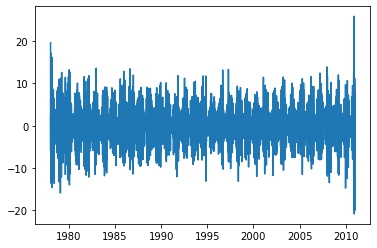

In [66]:
senal_smooth = np.convolve(value, difcoefs, mode = 'same')
plot(t,senal_smooth)

Indica los cambios que hay de muestra a muestra, siendo los periodos dónde hay más variación, aquellos en los que la amplitud de la gráfica es mayor.

C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


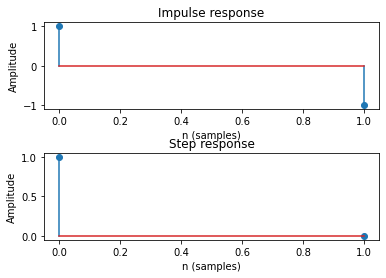

In [57]:
impz(num, den)

La respuesta al impulso nos dice que simplemente hay una inversión de la muestra siguiente.
La respuesta al escalón nos dice que su respuesta se da con la entrada de la primera muestra, ya que en 0 ya alcanza su valor máximo y no hay que esperar otra muestra. Esto tiene sentido ya que este filtro se basa en la muestra inmediatamente anterior para dar su respuesta, por lo que su respuesta en teoría es inmediata. Estos diagramas confirman la teoría.

C:\Users\josed\Documents\Universidad\8 Pds\Laboratorio\3\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


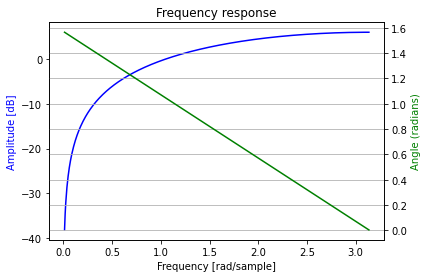

In [58]:
mfreqz(num, den)

Es un filtro pasaaltas, ya que las bajas frecuencias no son admitidas, hay una atenuación de -3dB o menor en freuencias menores que aproximadamente 0.5 rad/muestra.
La fase se invierte, y va disminuyendo de manera linear al aumentar la frecuencia, lo que obedece al comportamiento de sumar el inverso de la muestra anterior.

<h2> Conclusiones </h2>
Se puede notar que los filtros de media móvil son muy útiles para analizar fenómenos en los que pequeños cambios en muestras individuales no son tan importantes como el comportamiento a grosso modo en un periodo de tiempo mayor. Hay que tener cuidado con lo que se le quiere dar peso ya que simplemente es un promedio, por lo que tiene las mismas limitaciones que uno pero aplicado en una escala de tiempo, así que una muestra que tenga un valor muy fuera de lo normal va a incidir bastante en la medición. Es útil para hacer un filtro sencillo, pero para hacer un análisis más profundo se necesitan mejores herramientas.
El filtro de primera diferencia, simplemente nos da una rata de cambio, nos puede decir que tan estable es una señal ya que nos dice sus cambios en cada muestra, si la señal es muy volatil esta se verá reflejada en la señal filtrada, mientras que si es estable también se verá en la señal filtrada. Nos puede decir periodos de interés, en donde haya una volatilidad que nos interese. Pero para que este filtro nos de información importante es necesario procesar la información después de aplicarle dicho filtro.
El uso de histogramas facilita el entendimiento intuitivo de un fenómeno ya que separa dicho fenómeno en bloques que podamos observar, eliminando un poco el ruido de alta frecuencia asociado a la señal que se estudiará.